# Make Chromosome Counts Figure

This notebook uses the counts table generated in the create_counts_table notebook to create a figure showing the pattern of chromosome gains and loss.

## Setup

In [2]:
import pandas as pd
import numpy as np
import cptac
import cnvutils
import cptac.utils as ut
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Place here the chromosome you want to look at. It must be a string
CHROMOSOME = '13'

In [4]:
# List here all the cancer types you want to look at. 
cnv = {
    'BRCA': cptac.Brca().get_CNV(),
    'CCRCC': cptac.Ccrcc().get_CNV(),
    'COLON': cptac.Colon().get_CNV(),
    'ENDO': cptac.Endometrial().get_CNV(),
    'GBM': cptac.Gbm().get_CNV(),
    'HNSCC': cptac.Hnscc().get_CNV(),
    'LSCC': cptac.Lscc().get_CNV(),
    'LUAD': cptac.Luad().get_CNV(),
    'OVARIAN': cptac.Ovarian().get_CNV()
}

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (<ipython-input-4-f16ffd6f9449>, line 7)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-4-f16ffd6f9449>, line 8)


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (<ipython-input-4-f16ffd6f9449>, line 9)


In [5]:
# Load in the counts table
counts = cnvutils.get_counts_table()

C:\Users\chels\anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
chromosome_counts = counts[counts.chromosome == CHROMOSOME]

## Make the Figure

In [7]:
# This will get all the information for the banding pattern
ideogram_data = cnvutils.get_cytoband_info()
chromo8 = ideogram_data[ideogram_data['#chromosome'] == CHROMOSOME]
colors = []
sections = list()
for index, row in chromo8.iterrows():
  sections.append((row['bp_start'], row['bp_stop']-row['bp_start']))
  if row['stain'] == 'gneg':
    colors.append('white')
  elif row['stain'] == 'gpos':
    if row['density'] == 25.0:
      colors.append('lightgray')
    elif row['density'] == 50.0:
      colors.append('gray')
    elif row['density'] == 75.0:
      colors.append('darkgray')
    else:
      colors.append('black')
  elif row['stain'] == 'acen':
    colors.append('red')
  else:
    colors.append('lightgray')

Text(0.07, 0.5, 'Number of Samples')

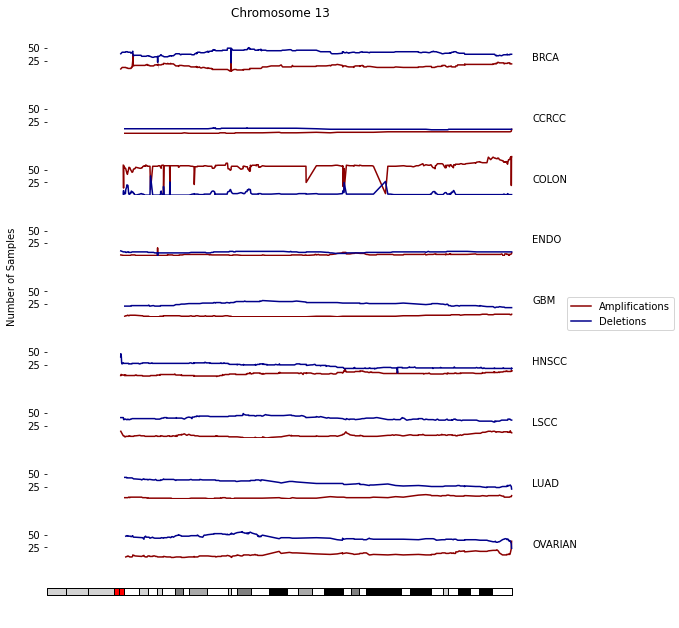

In [8]:
count = 0
end_bp = sections[len(sections) - 1][0] + sections[len(sections) - 1][1]
fig, axs = plt.subplots(nrows=len(cnv) + 1, sharex=True, sharey=True, num=0, figsize=(10,11), )
title = f'Chromosome {CHROMOSOME}'
fig.suptitle(title, y=0.9, x=0.45)
plt.xlim(0,175138636)
plt.xlim(0,end_bp + (end_bp/5))
plt.ylim(0, 100)
for cancer in cnv.keys():
    frame = chromosome_counts[chromosome_counts.cancer == cancer]
    axs[count].get_xaxis().set_visible(False)
    axs[count].set_yticks([25,50])
    axs[count].set_frame_on(False)
    axs[count].text(end_bp + 5000000, 25, cancer)
    sns.lineplot(x="start_bp", y="value", hue="variable", palette=['darkred', 'darkblue'], data=frame, ax=axs[count], legend=False)
    axs[count].set_ylabel("")
    count += 1
plt.broken_barh(sections, (50,15), facecolors=colors, edgecolor="black")
plt.axis('off')
fig.legend(labels=("Amplifications", "Deletions"), loc='center right')
fig.text(0.07, 0.5, "Number of Samples", rotation="vertical")